# A 4.1 Integración de datos

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from fontTools.subset import prune_hints

In [68]:
t01 = pd.read_excel("table01.xlsx")
t01.info()
t02 = pd.read_csv("table02.csv")
t02.info()
t03 = pd.read_csv("table03.csv")
t03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   50 non-null     int64         
 1   Email        50 non-null     object        
 2   OrderDate    50 non-null     datetime64[ns]
 3   OrderAmount  50 non-null     float64       
 4   ShipAddress  50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         34 non-null     int64  
 1   Customer_Name  34 non-null     object 
 2   Purchase_Date  34 non-null     object 
 3   Total_Spent    34 non-null     float64
 4   Location       33 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB
<c

### Estandarizar nombres de columnas: elegir una convención de nomenclatura coherente. (2 pts)

In [69]:
# Se cambiaron los nombres de las columnas para tener un nombre unico en las tres, para hacer las siguientes operaciones mas facil
t01 = t01.rename(columns={'CustomerID':'cID'})
t02 = t02.rename(columns={'CustID':'cID'})
t03 = t03.rename(columns={'MemberID':'cID'})

In [70]:
t01 = t01.rename(columns={'Email':'cEmail'})
t03 = t03.rename(columns={'Member_Email':'cEmail'})

In [71]:
t01 = t01.rename(columns={'ShipAddress':'cAddress'})
t03 = t03.rename(columns={'Address':'cAddress'})

In [72]:
t01.info()
t02.info()
t03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cID          50 non-null     int64         
 1   cEmail       50 non-null     object        
 2   OrderDate    50 non-null     datetime64[ns]
 3   OrderAmount  50 non-null     float64       
 4   cAddress     50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cID            34 non-null     int64  
 1   Customer_Name  34 non-null     object 
 2   Purchase_Date  34 non-null     object 
 3   Total_Spent    34 non-null     float64
 4   Location       33 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB
<c

### Estandarizar formatos de datos: convertir todas las fechas a un formato uniforme.

In [73]:
t01['OrderDate'] = pd.to_datetime(t01['OrderDate'])
t02['Purchase_Date'] = pd.to_datetime(t02['Purchase_Date'])
t03['JoinDate'] = pd.to_datetime(t03['JoinDate'])

In [74]:
t01

,cID,cEmail,OrderDate,OrderAmount,cAddress
0,1001,john.doe@email.com,2024-10-26,125.50,123 Main St
1,1002,jane.smith@email.com,2024-10-27,50.00,456 Oak Ave
2,1003,peter.jones@email.com,2024-10-28,200.75,789 Pine Ln
3,1004,mary.brown@email.com,2024-10-28,75.25,321 Elm Rd
4,1005,david.lee@email.com,2024-10-29,90.00,654 Pinecrest Dr
5,1006,sarah.white@email.com,2024-10-30,150.00,999 Willow Dr
6,1007,robert.green@email.com,2024-10-31,60.50,246 Maple Ave
7,1008,linda.black@email.com,2024-11-01,110.25,135 Cedar Ln
8,1009,michael.blue@email.com,2024-11-02,85.00,864 Birch Rd
9,1010,jennifer.gray@email.com,2024-11-03,175.75,579 Spruce St


In [75]:
t02 = t02.sort_values(by="cID", ascending=True)
t02

,cID,Customer_Name,Purchase_Date,Total_Spent,Location
0,1001,John Doe,2024-10-26,130.00,Store A
3,1002,Jane Smith,2024-10-27,49.99,Store C
1,1003,Peter Jones,2024-10-28,195.50,Store B
2,1005,David Lee,2024-10-29,90.00,Store A
4,1006,Sarah White,2024-10-30,155.00,Store D
5,1007,Robert Green,2024-10-31,62.00,Store B
6,1008,Linda Black,2024-11-01,112.50,Store A
7,1009,Michael Blue,2024-11-02,87.00,Store C
8,1010,Jennifer Gray,2024-11-03,178.00,Store D
9,1011,Christopher Red,2024-11-04,97.00,Store B


In [76]:
t03

,cID,cEmail,JoinDate,Points,cAddress
0,1001,john.doe@email.com,2023-05-15,1500.0,123 Main Street
1,1002,jane.smith@email.com,2023-08-01,800.0,456 Oak Avenue
2,1003,peter.jones@email.com,2023-11-20,2200.0,789 Pine Lane
3,1006,sarah.white@email.com,2024-01-10,300.0,999 Willow Drive
4,1007,robert.green@email.com,2024-02-15,450.0,246 Maple Avenue
5,1008,linda.black@email.com,2024-03-20,600.0,135 Cedar Lane
6,1009,michael.blue@email.com,2024-04-25,750.0,864 Birch Road
7,1010,jennifer.gray@email.com,2024-05-30,900.0,579 Spruce Street
8,1011,christopher.red@email.com,2024-06-04,1050.0,258 Walnut Avenue
9,1012,amanda.yellow@email.com,2024-07-09,1200.0,159 Cherry Lane


### Gestionar valores faltantes: determinar cómo dirigirse a los clientes presentes en algunas tablas, pero no en otras. (2 pts)

Tras analizar los datos, se puede determinar en la primera tabla, que pidieron una orden en internet por cierta cantidad, y ya se fue a recoger en físico a la tienda real, donde se terminó pagando *[Ejemplo, se ordena y paga en tienda]*. Ahora bien, algunos clientes no fueron a recoger su pedido, por lo cual no se completaría y, por lo tanto, aparecería en la segunda tabla. En cuanto a la tercera, existe la posibilidad donde el cliente no tiene una cuenta en el programa de fidelización.

Se pueden crear tres columnas extras al hacer merge:
1. Comision *[Resta entre lo pagado y el total de internet]*
2. Orden completada *[True, False]* *[Se encuentra, o no, en la segunda tabla]*
3. Miembro_VIP *[True, False]* *[Se encuentra, o no, en el programa de fidelización]*


### Resolver discrepancias de direcciones: limpiar y estandarizar los datos de direcciones

In [77]:
abbr = {
    "Street": "St", "Avenue": "Ave", "Lane": "Ln", "Road": "Rd", "Drive": "Dr"
}

def limpio(addr):
    for long, short in abbr.items():
        addr = re.sub(rf'\b{long}\b', short, addr) # Reorganiza el string ya con las abreviaturas hechas
    return addr.strip()  # Elimina espacios innecesarios


t01["cAddress"] = t01["cAddress"].astype(str).apply(limpio)
t03["cAddress"] = t03["cAddress"].astype(str).apply(limpio)


### Resolver discrepancias de importe: determinar si las diferencias se deben a impuestos u otros factores.

Las discrepancias en el importe se puede tomar como una cortesía, en caso de que sea negativo, y una pequeña comisión, pues las diferencias rondan entre 2 y 2.25, con algunos datos que se salen de esto, siendo de $5, un centavo, y ninguna diferencia.

# Merge

In [78]:
import pandas as pd

t01.rename(columns={"OrderDate": "Order_Date", "OrderAmount": "Order_Amount"})
t02.rename(columns={"Customer_Name": "cName"})
t03.rename(columns={"JoinDate": "Join_Date"})

# Merge de t01 y t03 utilizando cID, cEmail y cAddress
merged = pd.merge(t01, t03, on=["cID", "cEmail", "cAddress"], how="outer")

# Se establece si son clientes del programa de fidelidad (True si tienen Join_Date)
merged["Joined_VIP"] = merged["Join_Date"].notna()

# Merge con t02 utilizando cID
merged = pd.merge(merged, t02, on="cID", how="outer")

# Se crea la columnda de orden completada (True si existen datos tanto Order_Date como Purchase_Date)
merged["Order_Completed"] = merged["Order_Date"].notna() & merged["Purchase_Date"].notna()

# Converte los valores NaN en puntos, order y total con 0
merged["Points"] = merged["Points"].fillna(0)
merged["Order_Amount"] = merged["Order_Amount"].fillna(0)
merged["Total_Spent"] = merged["Total_Spent"].fillna(0)

# Calcula la comisión como Total_Spent - Order_Amount, si es menor a 0, se mantiene en 0
merged["Commision"] = (merged["Total_Spent"] - merged["Order_Amount"]).round(2).clip(lower=0)

# Selección final de columnas, incluyendo Join_Date y Joined_VIP por separado
MergedData = merged[[
    "cID", "cName", "cEmail", "cAddress", "Join_Date", "Joined_VIP", "Points",
    "Order_Date", "Purchase_Date", "Order_Completed", "Order_Amount",
    "Total_Spent", "Commision", "Location"
]]

# Guardar el resultado en un archivo CSV
MergedData.to_csv("MergedData.csv")


KeyError: 'Join_Date'

# Análisis descriptivo basado en el uso de gráficas

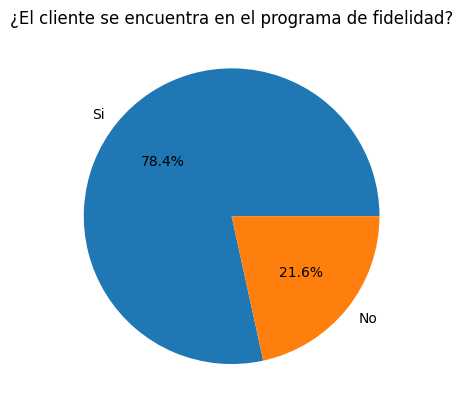

In [47]:
propo = MergedData["Joined_VIP"].value_counts()
propolab = 'Si','No'
plt.pie(propo, labels=propolab, autopct='%1.1f%%')
plt.title("¿El cliente se encuentra en el programa de fidelidad?")
plt.show()

1 de cada 5 personas no se encuentra en el programa de fidelidad. Esta cifra es buena, pero puede ser mejor, ya que beneficia tanto al cliente como a la compañía

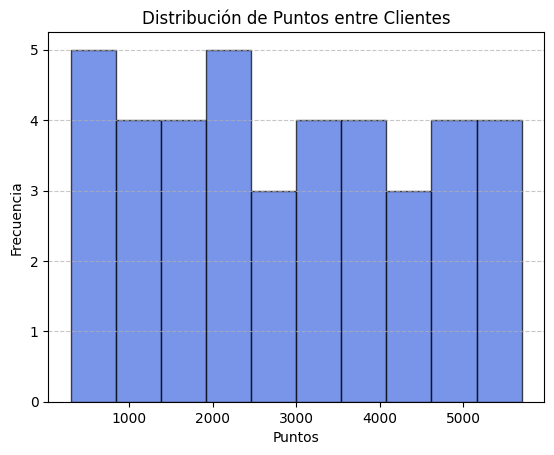

In [54]:
puntos_no0 = [p for p in MergedData["Points"] if p > 0]

plt.hist(puntos_no0, bins=10, color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("Puntos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Puntos entre Clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

La distribución de los puntos es extrañamente estable. La mayoría de las personas tienen más de 2500 puntos. Dependiendo de cómo se canjeen los puntos, quisa sea buena opción reducir la cantidad ganada para que no afecte tanto a la compañía

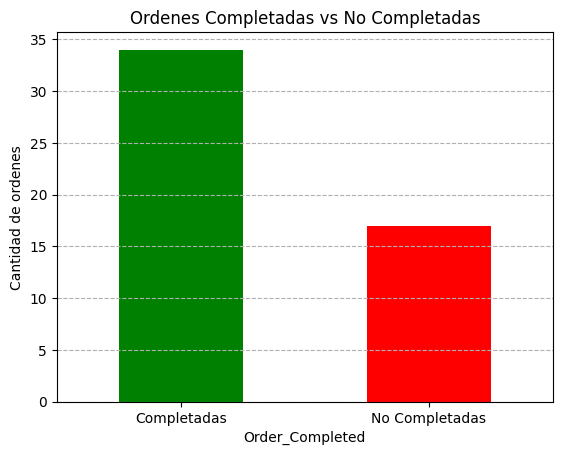

In [65]:
ordenCompletada = MergedData["Order_Completed"].value_counts()

ordenCompletada.plot(kind="bar", color=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Completadas", "No Completadas"], rotation=0)
plt.ylabel("Cantidad de ordenes")
plt.title("Ordenes Completadas vs No Completadas")
plt.grid(axis="y", linestyle="--")


Al menos un tercio de las ordenes no han sido completadas, esto representa la falta de ingreso de la compañía. Se les debe de enviar un e-mail de recordatorio para que terminen el proceso.

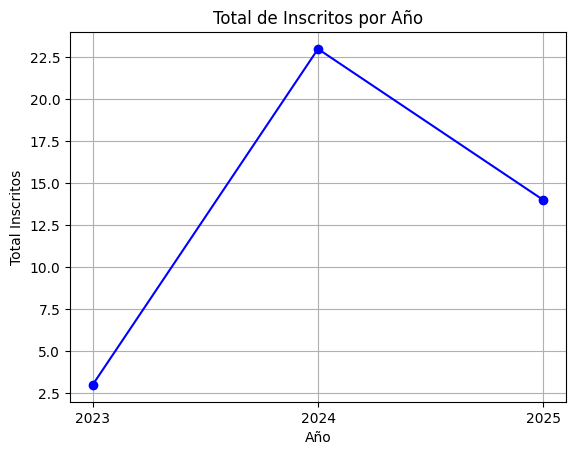

In [66]:
MergedData['year'] = MergedData['Join_Date'].dt.year
tot_anio = MergedData.groupby('year').size()
#tot_anio
plt.plot(tot_anio.index, tot_anio, label='Total de Delitos', color='blue', marker='o')
plt.title('Total de Inscritos por Año')
plt.xlabel('Año')
plt.ylabel('Total Inscritos')
plt.grid(True)
plt.xticks([2023, 2024, 2025])
plt.show()

2023 y 2025 parecen bajos. El primer año se puede deber a que recién se empezaba el programa, por lo que las inscripciones fueron bajas. En el 2025 solo se han tomado en cuenta los primeros meses, por lo cual este punto puede subir a medida que avance el año.

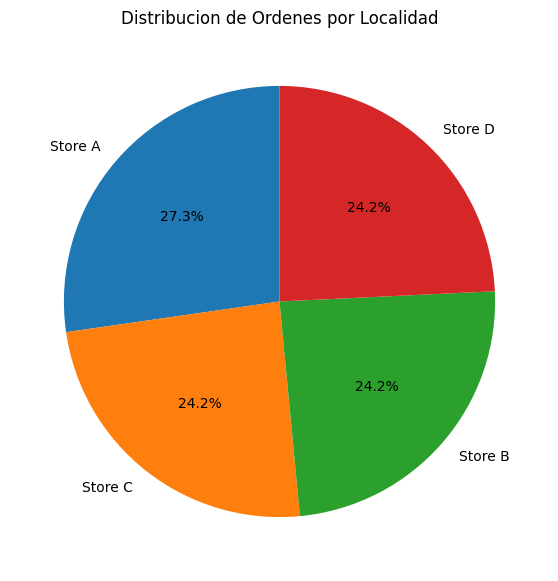

In [81]:
loc = MergedData["Location"].dropna()
locs = loc.value_counts()
plt.figure(figsize=(7, 7))
plt.pie(locs.values, labels=locs.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribucion de Ordenes por Tienda')

plt.show()

Dentro de las ordenes completadas, se mantiene un balance entre el número por tienda. Esto indica que de momento no se tienen que tomar medidas.